# Описание датасетов:

1. Результаты теннисных матчей. Задача предсказания победителя. (Классификация)
2. Предсказание пола по весу и росту. (Регрессия)

## Метрики качества

В первом датасете будет оцениваться точность(accuracy) предсказания, т.е. доля правильных прогнозов, относительно их количества

Рассмотрим сначала второй датасет с регрессией

In [1]:
from sklearn import linear_model
from sklearn import model_selection, metrics
from sklearn import preprocessing
import pandas as pd
reg_df = pd.read_csv("./datasets/weight-height.csv")

print(f"Размер данных: {reg_df.shape}")
print(f"Пропуски в данных:\n{reg_df.isnull().sum()}")
print(f"Дубликаты в данных: {reg_df.duplicated().sum()}")

reg_df.info()

Размер данных: (10000, 3)
Пропуски в данных:
Gender    0
Height    0
Weight    0
dtype: int64
Дубликаты в данных: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [2]:
reg_df.sample()

,Gender,Height,Weight
6690,Female,64.210866,158.206206


Видим, что первая колонка является таргетом, остальные -- признаками. Выделим их в отдельные таблицы, заменим строковой таргет на целочисленный

In [3]:
encoder = preprocessing.LabelEncoder()

x = reg_df[["Height", "Weight"]]
y = reg_df['Gender']

encoder.fit(y)
print(type(y), encoder.classes_)
y = pd.Series(encoder.transform(y))
type(y), y.head()

<class 'pandas.core.series.Series'> ['Female' 'Male']


(pandas.core.series.Series,
 0    1
 1    1
 2    1
 3    1
 4    1
 dtype: int64)

Разделим выборку на тестовую и обучающую части

In [4]:
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(
    x, y, test_size=0.3, random_state=51)

xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((7000, 2), (3000, 2), (7000,), (3000,))

Обучим логистическую регрессию на наших данных

In [5]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(xTrain, yTrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Проверим точность предсказания на тестовой выборке

In [6]:
yPredicted = model.predict(xTest)
accuracy = metrics.accuracy_score(yTest, yPredicted)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


Получили бейзлайн в 92% правильных прогнозов

Теперь создадим бейзлайн для задачи классификации

In [7]:
class_df = pd.read_csv("./datasets/atp_tennis.csv")

print(f"Размер данных: {class_df.shape}")
print(f"Пропуски в данных:\n{class_df.isnull().sum()}")
print(f"Дубликаты в данных: {class_df.duplicated().sum()}")

class_df.info()

Размер данных: (66681, 17)
Пропуски в данных:
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64
Дубликаты в данных: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66681 entries, 0 to 66680
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  66681 non-null  object 
 1   Date        66681 non-null  object 
 2   Series      66681 non-null  object 
 3   Court       66681 non-null  object 
 4   Surface     66681 non-null  object 
 5   Round       66681 non-null  object 
 6   Best of     66681 non-null  int64  
 7   Player_1    66681 non-null  object 
 8   Player_2    66681 non-null  object 
 9   Winner      66681 non-null  object 
 10  Rank_1      66681 non-null  int64  
 11  

In [8]:
class_df.sample()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
28294,Sony Ericsson Open,2010-03-29,Masters 1000,Outdoor,Hard,3rd Round,3,Federer R.,Serra F.,Federer R.,1,61,11035,735,1.01,13.0,7-6 7-6


# Обзор данных

Рассмотрим распределение категорийных признаков(Tournament, Series, Court, Surface, Round, Score)

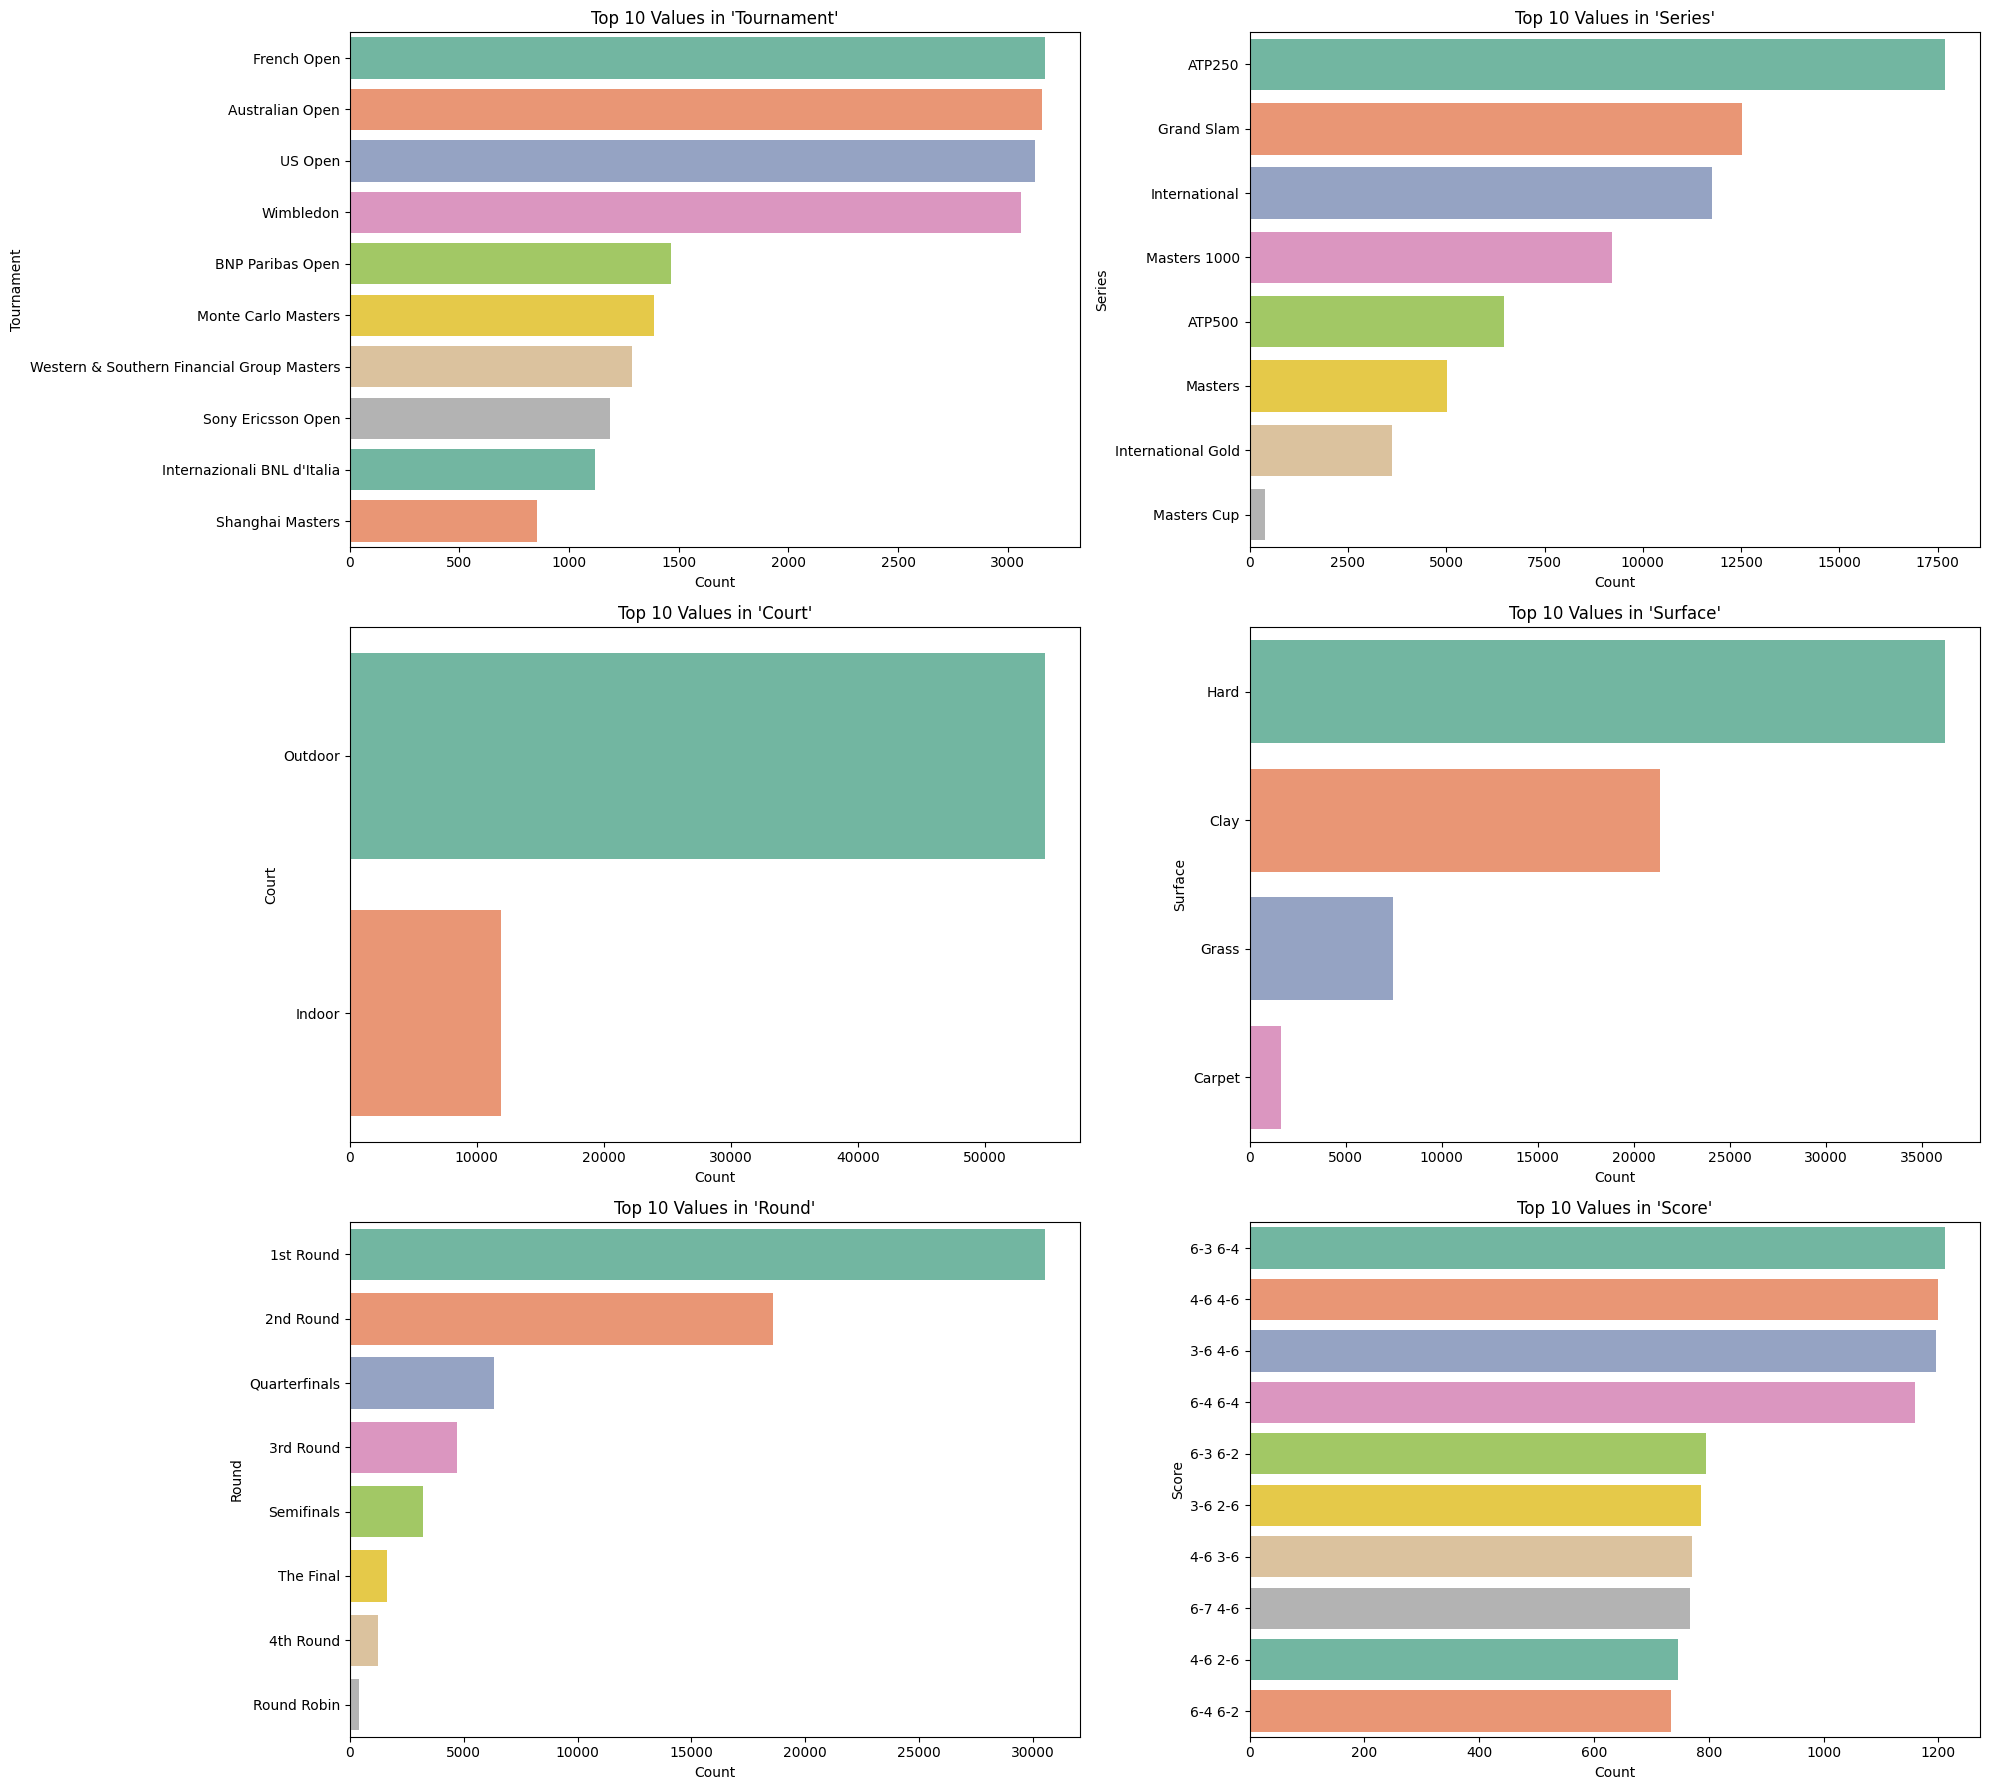

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_cols = ['Tournament', 'Series', 'Court', 'Surface', 'Round', 'Score']
plt.figure(figsize=(20, 18))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    top_values = class_df[col].value_counts().nlargest(10)
    sns.barplot(y=top_values.index, x=top_values.values, palette='Set2', hue=top_values.index, legend=False)
    plt.title(f"Top 10 Values in '{col}'", fontsize=12)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()

Рассмотрим расспределение числовых данных

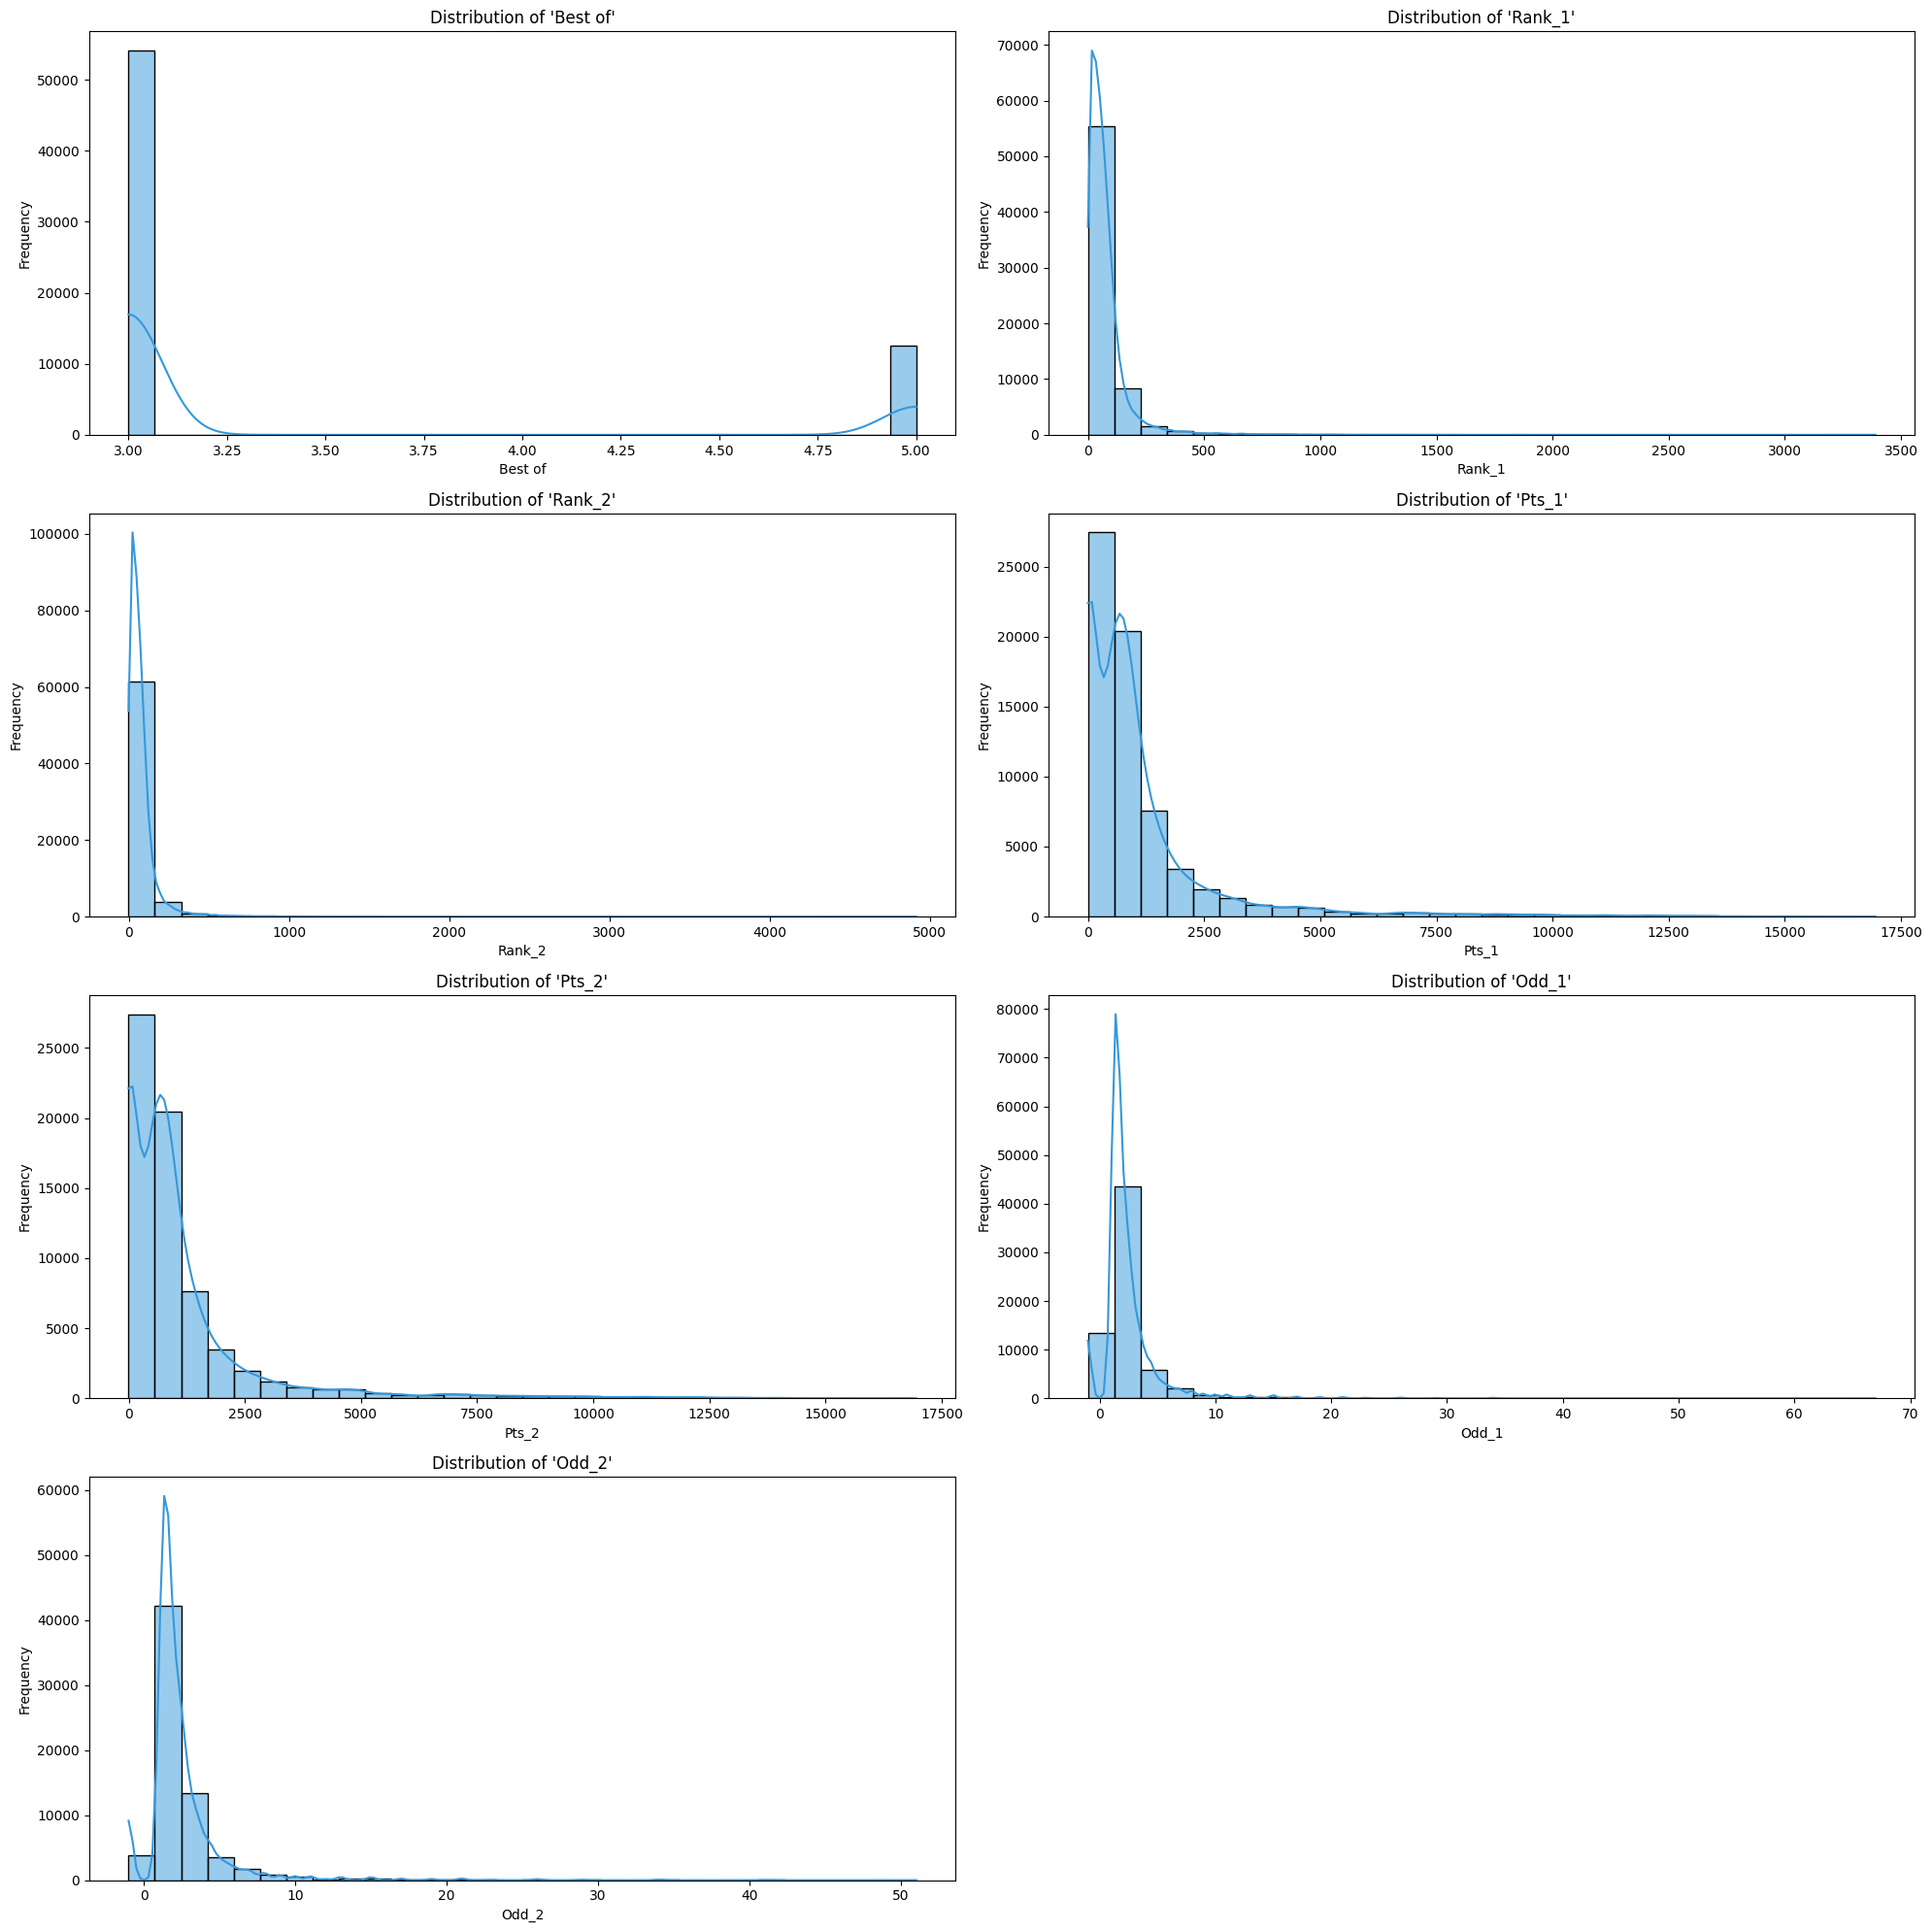

In [10]:
numerical_cols = ['Best of', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2']
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(class_df[col], kde=True, bins=30, color='#3498db')
    plt.title(f"Distribution of '{col}'", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

## Создание бейзлайна по основным признакам

Для данных модели будем использовать три основных показателя(odds -- шансы, pts -- очки и rank -- рейтинг) у соперников

Будем предсказывать факт того, является будет ли первый игрок победителем

In [11]:
class_df["Target"] = (class_df["Winner"] == class_df["Player_1"]).astype(int)

x = class_df[["Rank_1", "Rank_2", "Odd_1", "Odd_2", "Pts_1", "Pts_2"]]
y = class_df["Target"]

xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size=0.3, random_state=51)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((46676, 6), (20005, 6), (46676,), (20005,))

Попробуем програть наши данные по всем классификаторам нашего курса

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

names = ["knn", "decision tree", "random forest", "gradient boosting"]
models = [KNeighborsClassifier(), DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=51), RandomForestClassifier(max_depth=7, random_state=51), GradientBoostingClassifier(random_state=51)]

for name, model in zip(names, models):
    model.fit(xTrain, yTrain)
    yPredicted = model.predict(xTest)
    print(f"{name} baseline: {metrics.accuracy_score(yTest, yPredicted):.2f}")

knn baseline: 0.61
decision tree baseline: 0.68
random forest baseline: 0.69
gradient boosting baseline: 0.69


# Улучшение бейзлайна

У меня есть гипотезы для задачи регрессии посчитать индекс массы тела, а для классификации -- отношения шансов, рейтинга и очков, а также их разницу(на счет разницы не уверен, т.к. это линейная комбинация признаков, но всё же)

In [13]:
reg_df["IBM"] = reg_df['Weight'] / reg_df["Height"]
reg_df = reg_df.dropna()


class_df["Rank_diff"] = class_df['Rank_1'] - class_df['Rank_2']
class_df["Odd_diff"] = class_df['Odd_1'] - class_df['Odd_2']
class_df["Pts_diff"] = class_df['Pts_1'] - class_df['Pts_2']

class_df["Rank_ratio"] = class_df['Rank_1'] / class_df['Rank_2']
class_df["Odd_ratio"] = class_df['Odd_1'] / class_df['Odd_2']
class_df["Pts_ratio"] = class_df['Pts_1'] / class_df['Pts_2']
class_df = class_df.dropna()

Проверим новый бейзлайн

In [14]:
# Регрессия
x = reg_df[["Height", "Weight", "IBM"]]
y = reg_df['Gender']

xTrain, xTest, yTrain, yTest = model_selection.train_test_split(
    x, y, test_size=0.3, random_state=51)

model = linear_model.LogisticRegression(max_iter=1000)
model.fit(xTrain, yTrain)

yPredicted = model.predict(xTest)
accuracy = metrics.accuracy_score(yTest, yPredicted)
print(f"Новая точность регрессии: {accuracy:.2f}")

# Классификация
x = class_df[["Rank_1", "Rank_2", "Odd_1", "Odd_2", "Pts_1", "Pts_2", "Rank_diff", "Odd_diff", "Pts_diff", "Rank_ratio", "Odd_ratio", "Pts_ratio"]]
y = class_df["Target"]

xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size=0.3, random_state=51)
names = ["knn", "decision tree", "random forest", "gradient boosting"]
models = [KNeighborsClassifier(), DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=51), RandomForestClassifier(max_depth=7, random_state=51), GradientBoostingClassifier(random_state=51)]

for name, model in zip(names, models):
    model.fit(xTrain, yTrain)
    yPredicted = model.predict(xTest)
    print(f"Модель {name}, новая точность: {metrics.accuracy_score(yTest, yPredicted):.2f}")

Новая точность регрессии: 0.92
Модель knn, новая точность: 0.61
Модель decision tree, новая точность: 0.69
Модель random forest, новая точность: 0.69
Модель gradient boosting, новая точность: 0.69


У модели решающего дерева по итогу точность повысилась на 0.01